In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")
def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

cluster_colors_hex = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
cluster_colors_rgb = [hex_to_rgb(x) for x in cluster_colors_hex]

custom_params = {
    "axes.spines.right":False,
    "axes.spines.top":False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize':'Large',
    'figure.facecolor':'#fdfcf6',
    'axes.facecolor':'#fdfcf6'
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(cluster_colors_hex),
    rc=custom_params
)

/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/imdbextensivedataset/IMDb movies.csv
/kaggle/input/imdbextensivedataset/IMDb ratings.csv


In [2]:
netflix_df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


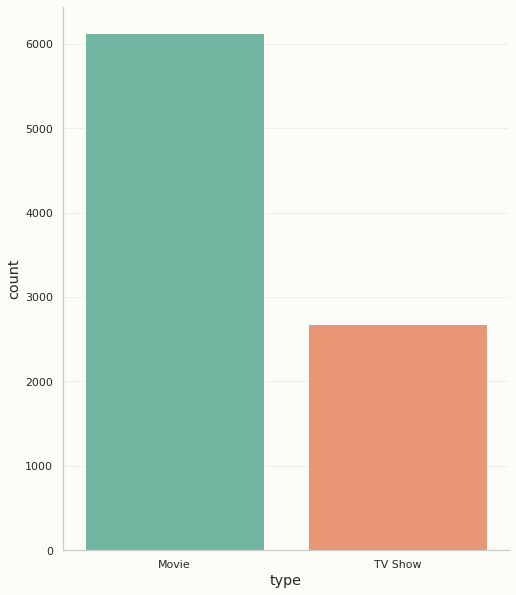

In [3]:
plt.figure(figsize=(8, 10))    
sns.countplot(x='type', data=netflix_df, palette="Set2")

plt.show()

- It is evident that there are more Movies on Netflix than TV Shows.

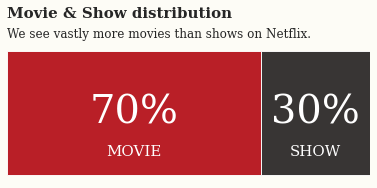

In [4]:
x = netflix_df.groupby(['type'])['type'].count()
y=len(netflix_df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("MOVIE", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("SHOW", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

#### If a produces wants t release some content, which month must he do so?

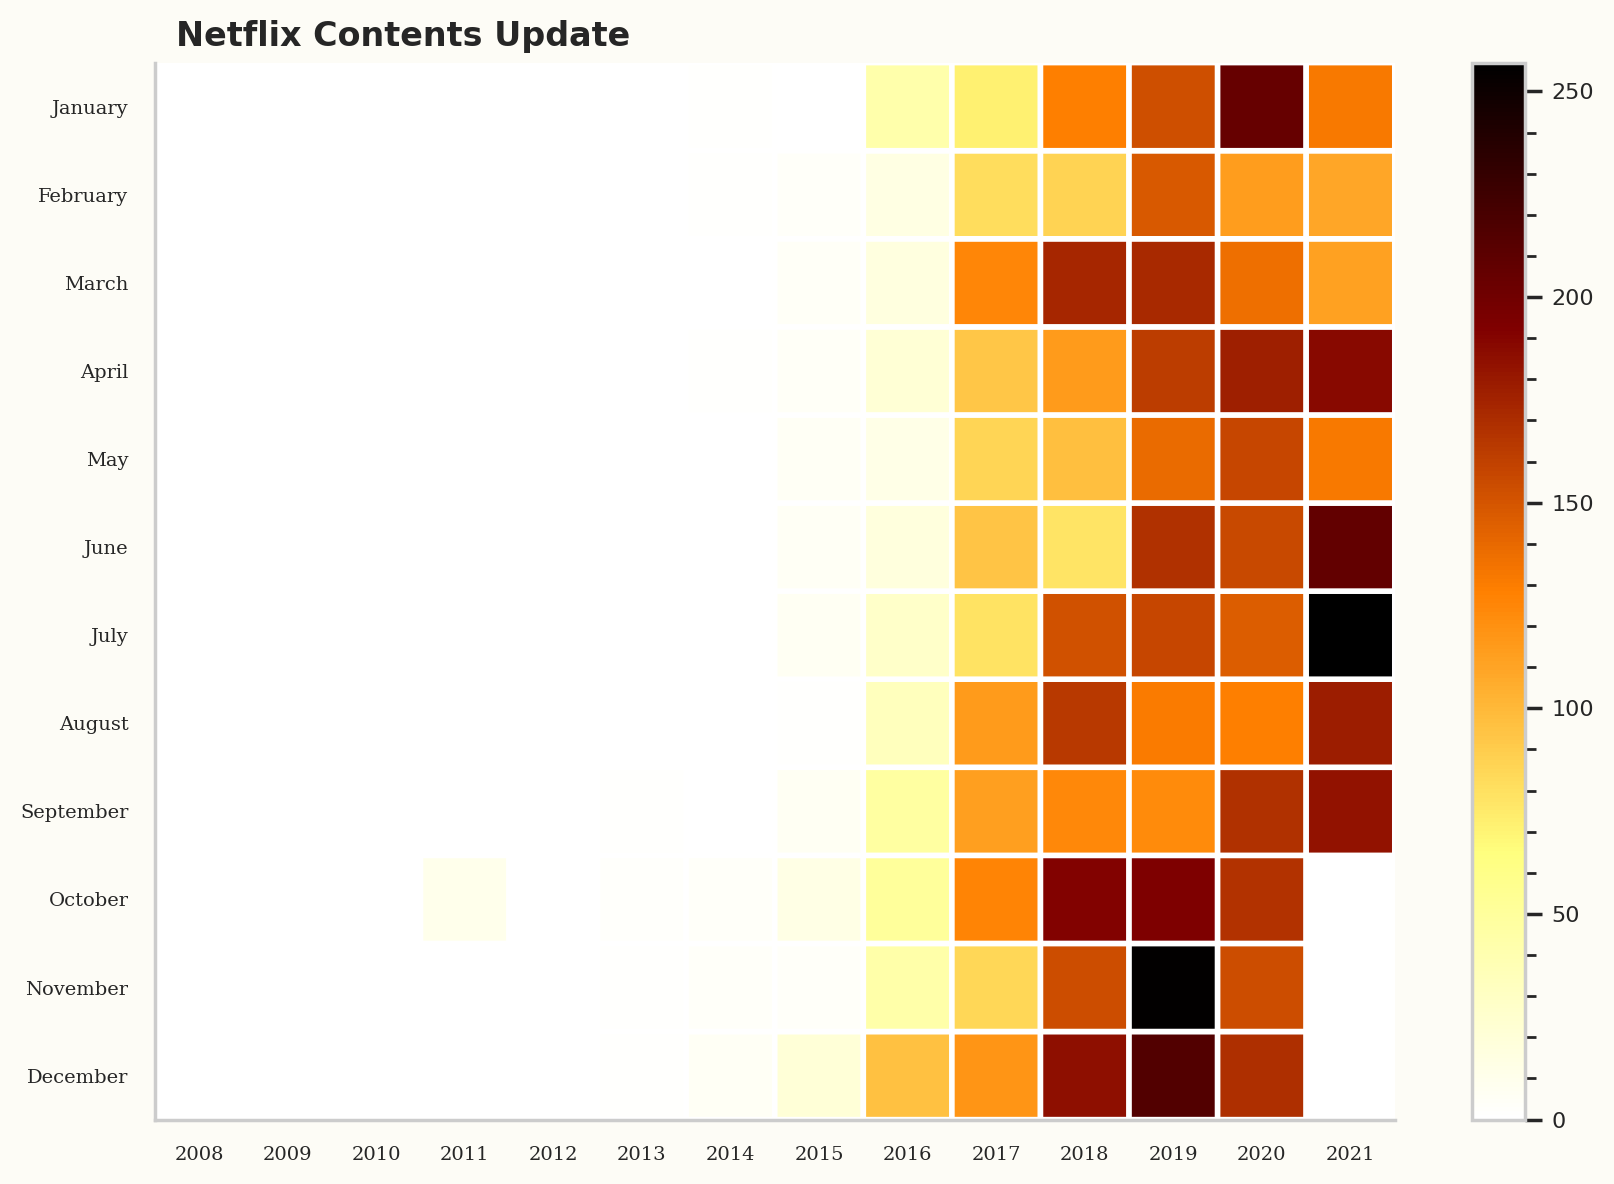

In [5]:
netflix_date = netflix_df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap

plt.xticks(np.arange(0.5, len(df.columns), 1), 
           df.columns, 
           fontsize=7, 
           fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), 
           df.index, 
           fontsize=7, 
           fontfamily='serif')

plt.title('Netflix Contents Update', 
          fontsize=12, 
          fontfamily='calibri', 
          fontweight='bold', 
          position=(0.2, 1+0.2))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()


- If the latest year 2021 is considered, February and March were the months when comparatively much less content was released. Therefore, these months may be a good choice for the success of a new release.

#### Movie rating analysis

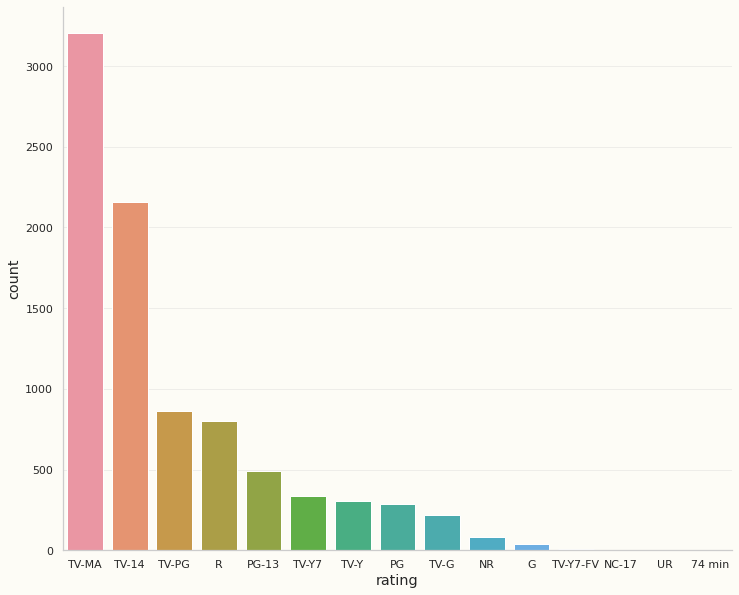

In [6]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index[0:15])

**Observation**<br>
- The largest count of movies are made with the **'TV-MA'** rating. **"TV-MA"** is a rating assigned by the TV Parental Guidelines to a television progam that was designed for mature audiences only.
- Second largest is the **'TV-14'** stands for content that may be inappropriate for children younger than 14 years of age.
- **'TV-PG'** and **'R'** has almost equal amount of movies.

#### Getting IMDB rating to get top rated movies and TV Shows on Netflix

In [7]:
imdb_ratings = pd.read_csv("/kaggle/input/imdbextensivedataset/IMDb ratings.csv", usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv("/kaggle/input/imdbextensivedataset/IMDb movies.csv", usecols=['title', 'year', 'genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                        'Release Year':imdb_titles.year,
                        'Rating':imdb_ratings.weighted_average_vote,
                        'Genre':imdb_titles.genre})

ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [8]:
ratings.dropna()
joint_data = ratings.merge(netflix_df, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

#### Top 10 rating movies on Netflix are:

In [9]:
top_rated = joint_data[:10]
fig = px.sunburst(
    top_rated,
    path=['title', 'country'],
    values='Rating',
    color='Rating'
)
fig.show()

#### Countries with highest rated content.

In [10]:
top_countries = joint_data['country'].value_counts().reset_index().rename(columns={'index':'Country', 'country':'count'}).sort_values(by='count', ascending=False)[:11]
data = dict(
    number = list(top_countries['count']),
    country = list(top_countries['Country'])
)
fig = px.funnel(data, x='number', y='country')
fig.show()

#### Year Wise Analysis

Text(0.5, 1.0, 'Movies Release every year')

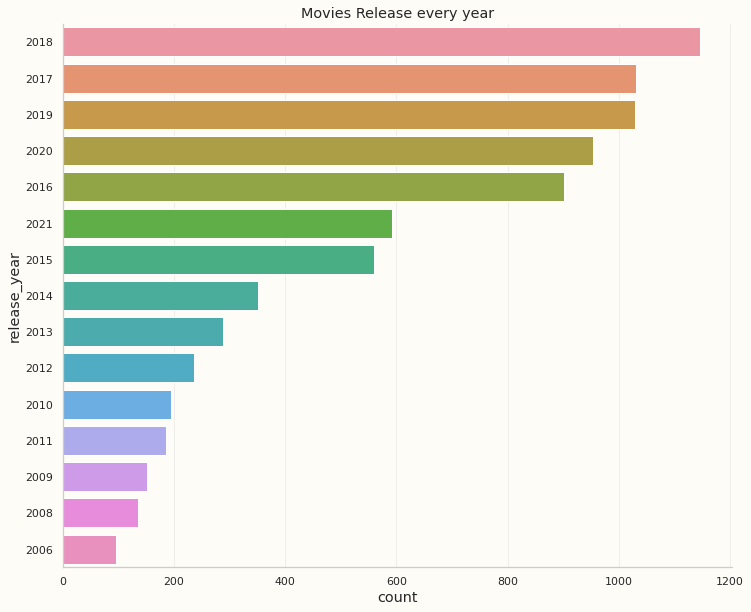

In [11]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(y='release_year', data=netflix_df, order=netflix_df['release_year'].value_counts().index[:15])
plt.title('Movies Release every year')

- So, 2018 ws the year when most of the movies were released.

#### Top 10 Content creating countries

In [12]:
top_countries = {}
countries_fin = {}
countries = list(netflix_df['country'].fillna('Unkown'))
for country in countries:
    country = list(country.split(','))
    if len(country) == 1:
        if country in list(top_countries.keys()):
            top_countries[country] += 1
        else:
            top_countries[country[0]] = 1
    else:
        for i in country:
            if i in list(top_countries.keys()):
                top_countries[i] += 1
            else:
                top_countries[i] = 1
            

for country, number in top_countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += number
    else:
        countries_fin[country] = number
        
countries_fin = {k : v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}

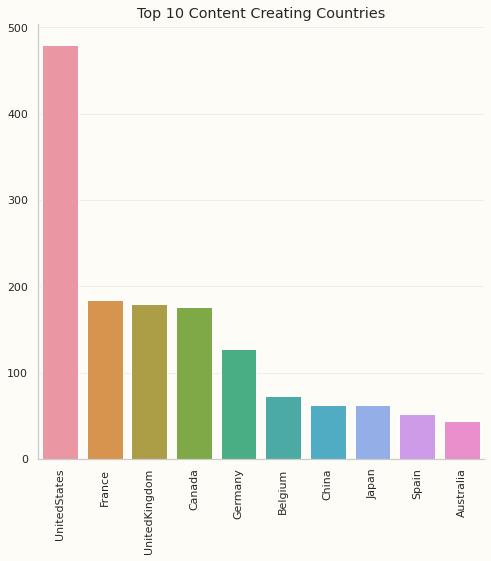

In [13]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=list(countries_fin.keys())[:10], y=list(countries_fin.values())[:10])
ax.set_xticklabels(list(countries_fin.keys())[:10], rotation=90)
plt.title('Top 10 Content Creating Countries')
plt.show()

- United States is dominating in netflix.

#### Analysis of duration of movies

<AxesSubplot:xlabel='duration', ylabel='Count'>

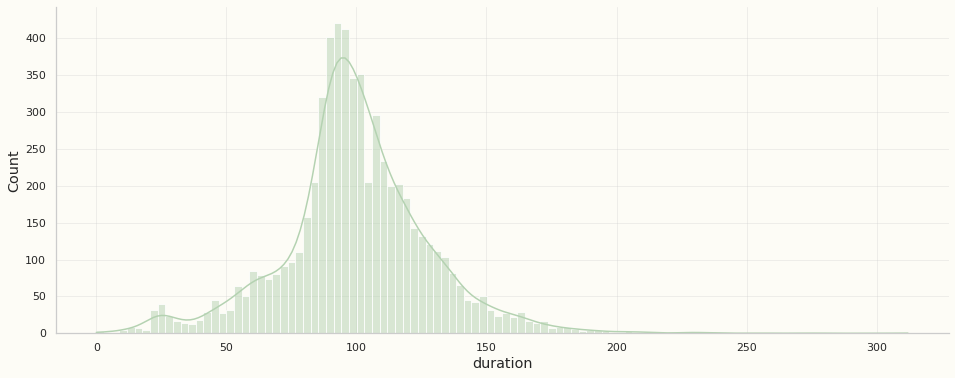

In [14]:
df = netflix_df.copy()
df = df[df['type'] != 'TV Show']
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = df['duration'].fillna(0)
df['duration'] = df['duration'].astype(int)
sns.histplot(data=df['duration'], kde=True)

- So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3hrs movies in one sitting.

#### Wordcloud for genres.

(-0.5, 399.5, 199.5, -0.5)

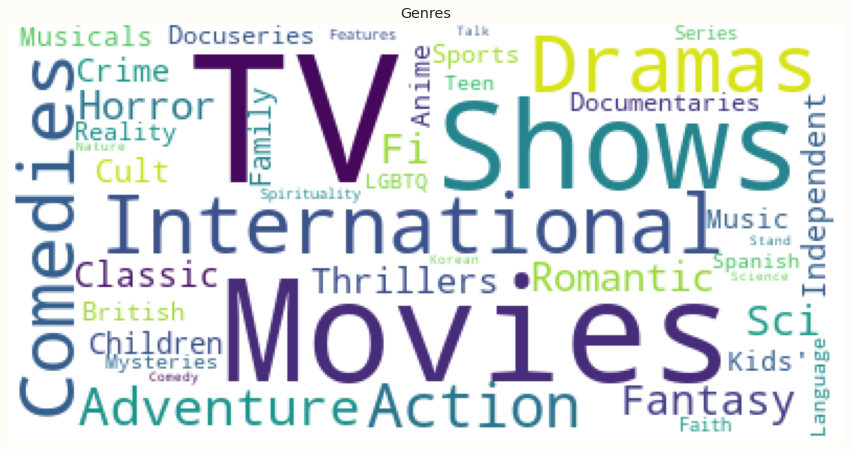

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 13))
temp = netflix_df.copy()
corpus = temp['listed_in'].apply(lambda x:x.split(',') if type(x) == str else ['']).value_counts().index.values.tolist()
corpus = ','.join(x for list_words in corpus for x in list_words)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False).generate(corpus)
plt.imshow(wordcloud)
plt.title('Genres')
plt.axis("off") 

#### Plot of Genres vs their counts on netflix.

Text(0.5, 1.0, 'Genres')

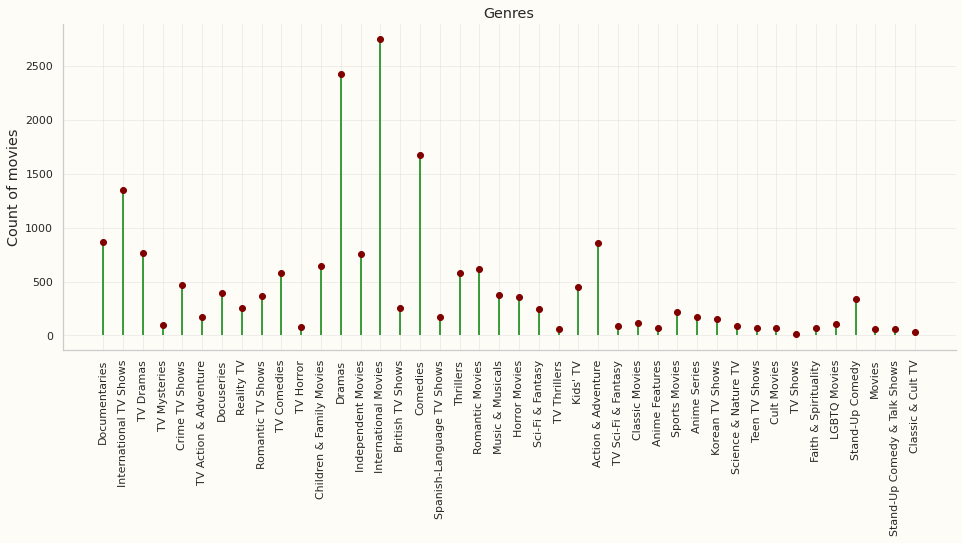

<Figure size 720x864 with 0 Axes>

In [16]:
import matplotlib.ticker as mticker

temp = netflix_df['listed_in'].apply(lambda x:x.split(', ')).values.tolist()
g = {}
for genres in temp:
    for genre in genres:
        if genre not in g:
            g[genre] = 1
        else:
            g[genre] += 1
        

fig, ax = plt.subplots()
fig = plt.figure(figsize=(10, 12))
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x, y, "o", color='maroon')
# ax.xaxis.set_major_locator(mticker.FixedLocator(x))
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')

### TV Shows

In [17]:
show_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

#### Most Content Creating Countries

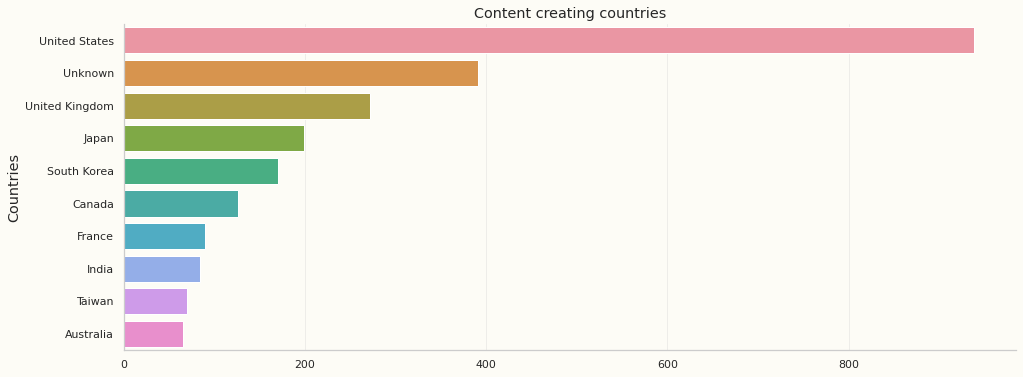

In [18]:
temp = show_df['country'].fillna('Unknown').apply(lambda x:x.split(', ')).values.tolist()

countries = {}
for i in temp:
    for country in i:
        if country not in countries:
            countries[country] = 1
        else:
            countries[country] += 1

countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse=True)}

plt.title('Content creating countries')
sns.barplot(y=list(countries.keys())[:10], x=list(countries.values())[:10])
plt.ylabel('Countries')
plt.show()

- Naturally, United States has the most content that is created on netflix in the tv series category also.

#### TV Shows with largest number of seasons

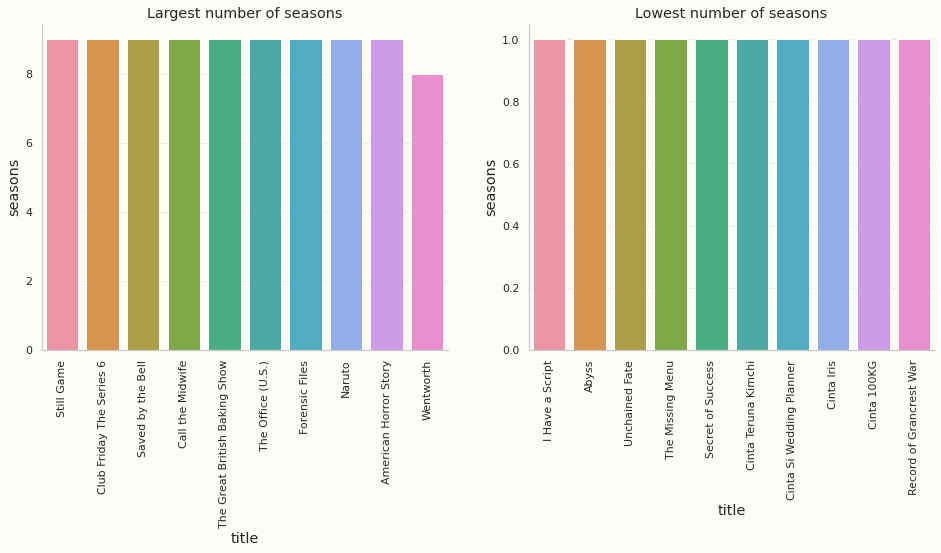

In [19]:
import re

duration = show_df.sort_values(by='duration', ascending=False)[['title', 'duration']]
duration['seasons'] = duration['duration'].str.extract(r"(\d)")
duration['seasons'] = duration['seasons'].astype('int')

fig, axes = plt.subplots(1, 2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
sns.barplot(data=duration[:10], ax=axes[0], x='title', y='seasons')
sns.barplot(data=duration[-10:], x='title', y='seasons')
axes[0].set_title('Largest number of seasons')
axes[1].set_title('Lowest number of seasons')
plt.show()
# sns.barplot(data=duration[:-20], x='title', y='no_of_seasons')
# plt.xticks(rotation=90)
# plt.title('Top 20 TV Shows with larest number of seasons.')

In [20]:
import plotly.graph_objects as go

newest_df = show_df.sort_values(by='release_year', ascending=False)[:20]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                               cells=dict(values=[newest_df['title'], newest_df['release_year']]))])
fig.show()

#### Content in India

In [21]:
netflix_ind = show_df[show_df['country'].eq('India')]
netflix_ind = netflix_ind.dropna()

In [22]:
fig = px.treemap(netflix_ind, path=['country', 'director'],
                 color='director', hover_data=['director', 'title'], color_continuous_scale='Purples')
fig.show()